# Código para geração de gráficos

O código abaixo cria os gráficos utilizados no trabalho com base nos arquivos de saída do algoritmo criado com Java.

## Importando dados

Antes de mais nada, precisamos importar os dados de duração do algoritmo de determinantes aplicando:

- Nenhuma otimização (baseline);

- Otimizações iniciais (versão 1);

- Otimizações extras (versão 2).

In [2]:
import pandas as pd

# Constantes que servem de rótulos dos dataframes seguintes
HEADER = ['tentativa_1', 'tentativa_2', 'tentativa_3']
INDEX = [3, 5, 7, 9, 11, 13]

# Bases de dados extraídas dos arquivos de saída de cada algoritmo
baseline_times = pd.read_csv('saida_baseline.txt', sep=' ', lineterminator='\n', names=HEADER, index_col=False)
baseline_times.index = INDEX

v1_optimization_times = pd.read_csv('saida_otimizacao_v1.txt', sep=' ', lineterminator='\n', names=HEADER, index_col=False)
v1_optimization_times.index = INDEX

v2_optimization_times = pd.read_csv('saida_otimizacao_v2.txt', sep=' ', lineterminator='\n', names=HEADER, index_col=False)
v2_optimization_times.index = INDEX

## Visualizando os dados

Vamos mostrar o comportamento temporal dos algoritmos usando os dados importados. Antes disso, vamos visualizar as tabelas com os valores de tempo.

OBS: Os valores estão expressos em nanossegundos (para ordens < 9) e em milissegundos (para ordens >= 9).

Nas tabelas, as linhas representam a ordem matricial e as colunas representam as três tentativas utilizadas para fazer medições.

Primeiro, vamos adicionar aos dados as *médias* de cada algoritmo:

In [3]:
baseline_times['media'] = baseline_times.mean(axis=1)
v1_optimization_times['media']= v1_optimization_times.mean(axis=1)
v2_optimization_times['media']= v2_optimization_times.mean(axis=1)

Vamos adicionar aos dados o *desvio padrão* de cada algoritmo:

In [4]:
baseline_times['desvio'] = baseline_times.std(axis=1)
v1_optimization_times['desvio']= v1_optimization_times.std(axis=1)
v2_optimization_times['desvio']= v2_optimization_times.std(axis=1)

Agora, podemos visualizar os dados em formato de tabela.

Primeiro, o resultado da execução do algoritmo sem otimizações (baseline).

In [5]:
baseline_times

,tentativa_1,tentativa_2,tentativa_3,media,desvio
3,82897,31708,41420,5.200833e+04,2.219854e+04
5,1125140,395046,1198966,9.063840e+05,3.628246e+05
7,12003803,3576999,3367071,6.315958e+06,4.022827e+06
9,206732640,192071470,136853351,1.785525e+08,3.008711e+07
11,12429921270,8530076217,7544198136,9.501399e+09,2.109530e+09
13,1079130850833,1085620222460,1079508303004,1.081420e+12,2.974147e+09


Os resultados do algoritmo com otimizações iniciais (versão 1):

In [6]:
v1_optimization_times

,tentativa_1,tentativa_2,tentativa_3,media,desvio
3,5306013,23264,133367,1.820881e+06,2.464770e+06
5,1118708,99448,392265,5.368070e+05,4.284795e+05
7,2160586,2216510,3479014,2.618703e+06,6.087598e+05
9,72189473,44340848,80956384,6.582890e+07,1.561019e+07
11,2329819636,2721029494,3368475895,2.806442e+09,4.283092e+08
13,438767739538,422120993935,280837917442,3.805756e+11,7.085184e+10


Os resultados do algoritmo com otimizações extras (versão 2):

In [7]:
v2_optimization_times

,tentativa_1,tentativa_2,tentativa_3,media,desvio
3,74672,11018,38388,4.135933e+04,2.607143e+04
5,302235,76408,929878,4.361737e+05,3.610701e+05
7,1783198,3299060,1728414,2.270224e+06,7.278406e+05
9,90807916,49588223,74940676,7.177894e+07,1.697573e+07
11,2395553368,2812744957,3764947858,2.991082e+09,5.730988e+08
13,435096419868,418332465201,275669937254,3.763663e+11,7.153121e+10


In [8]:
import matplotlib.pyplot as plt

In [9]:
def showResults(datasets, labels, log=True):
    plt.figure(figsize=(10, 6))  # Ajuste o tamanho da figura conforme necessário

    for i, data in enumerate(datasets):
        index = data.index
        mean = data['media']
        std = data['desvio']

        # Plotar a média das linhas
        plt.plot(index.to_numpy(), mean.to_numpy(), marker='o', label=labels[i])
        # Preencher a área entre a média +/- desvio padrão
        plt.fill_between(index, mean - std, mean + std, alpha=0.2)

    plt.xlabel('Ordem Matricial')
    plt.ylabel('Tempo (ns)')
    plt.title('Latência Média - Algoritmos')
    plt.legend()

    if log:
        plt.yscale('log')

    plt.grid()
    plt.show()

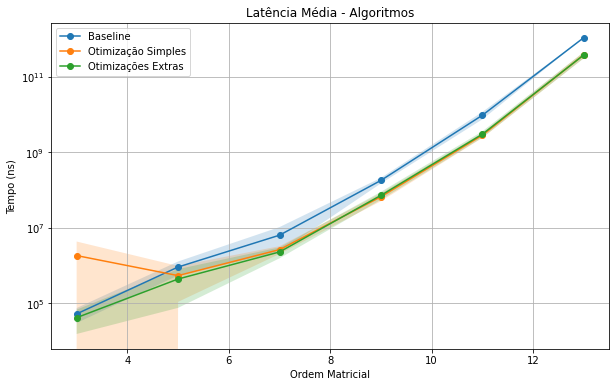

In [10]:
showResults(
    datasets=[baseline_times, v1_optimization_times, v2_optimization_times],
    labels=['Baseline', 'Otimização Simples', 'Otimizações Extras'],
    log=True
)

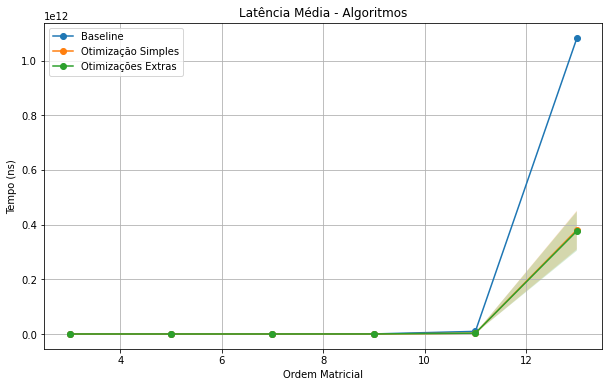

In [11]:
showResults(
    datasets=[baseline_times, v1_optimization_times, v2_optimization_times],
    labels=['Baseline', 'Otimização Simples', 'Otimizações Extras'],
    log=False
)